# Prepare a model for glass classification using KNN


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#load dataset

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
#EDA

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
#missing value imputation

In [6]:
df.loc[:,"RI":'Fe'] = df.loc[:,"RI":'Fe'].replace(0, np.nan)

In [7]:
df.loc[:,"RI":'Fe']

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,NaN
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,NaN,NaN
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,NaN
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,NaN,2.88,72.61,0.08,9.18,1.06,NaN
210,1.51685,14.92,NaN,1.99,73.06,NaN,8.40,1.59,NaN
211,1.52065,14.36,NaN,2.02,73.42,NaN,8.44,1.64,NaN
212,1.51651,14.38,NaN,1.94,73.61,NaN,8.48,1.57,NaN


In [8]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_percentage 

RI       0.00
Na       0.00
Mg      19.63
Al       0.00
Si       0.00
K       14.02
Ca       0.00
Ba      82.24
Fe      67.29
Type     0.00
dtype: float64

In [ ]:
#wecan drop column "Ba" and "Fe" but we will keep it as it is as dataset is small

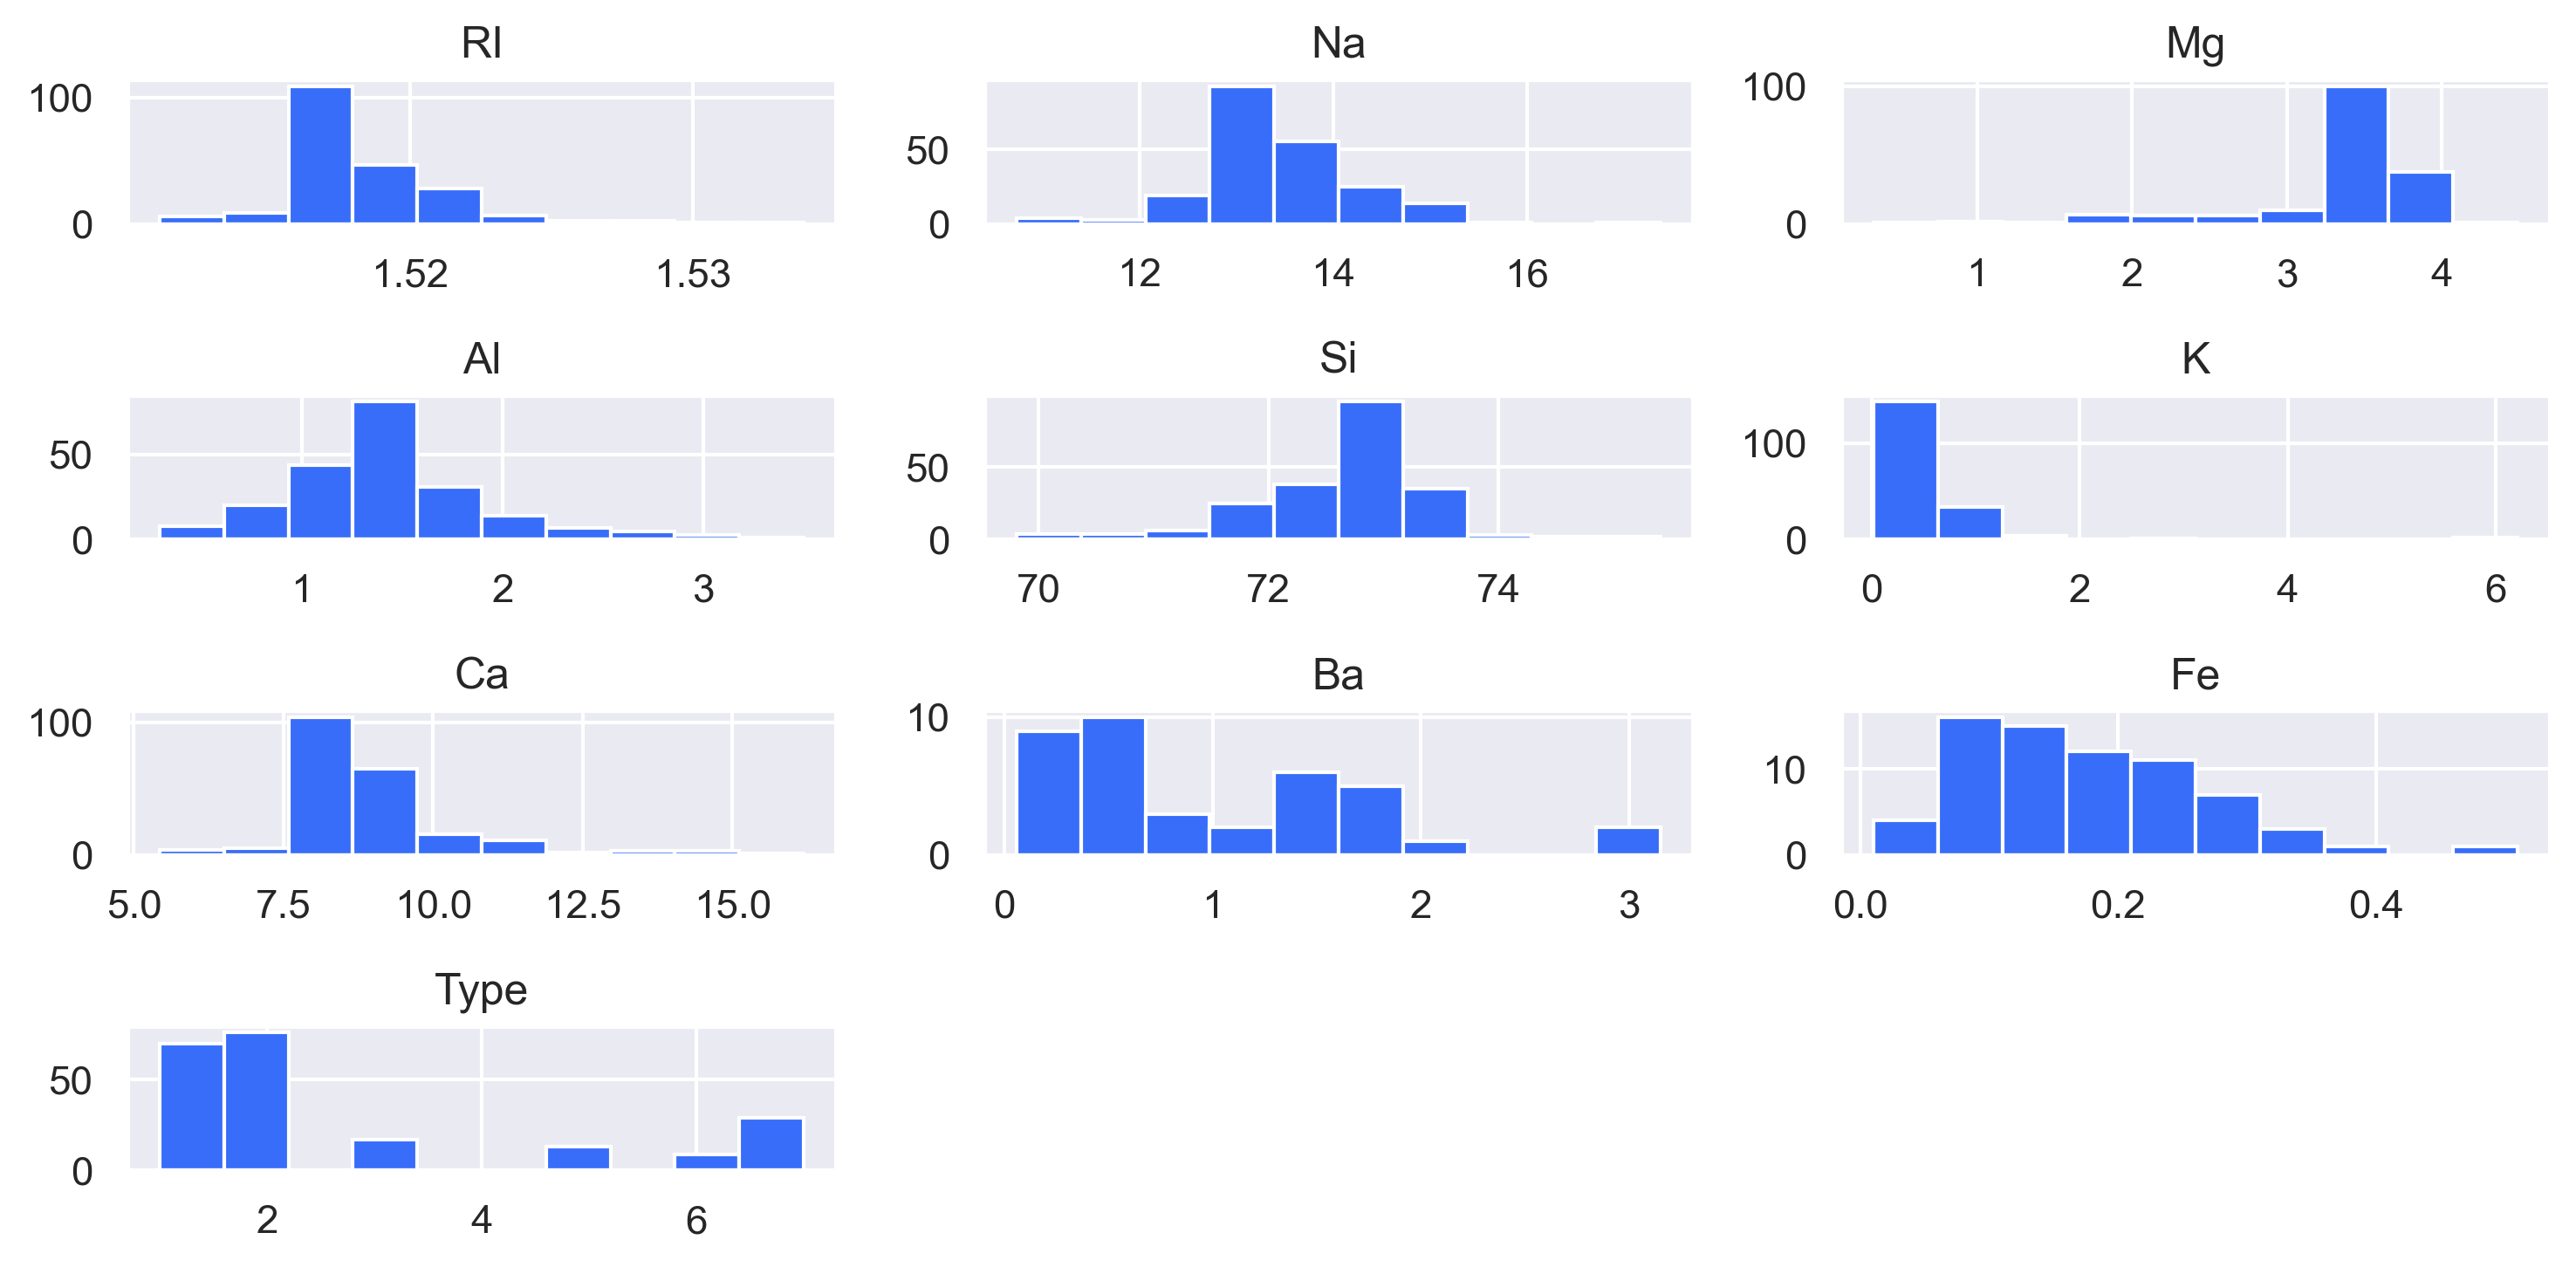

In [12]:
#plotting Histogam to check outlier datapoint

df.hist()
plt.tight_layout()

In [14]:
si = SimpleImputer(strategy='median')

df.loc[:,"RI":'Fe'] = si.fit_transform(df.loc[:,"RI":'Fe'])

In [15]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.490,1.10,71.78,0.06,8.75,0.68,0.165,1
1,1.51761,13.89,3.600,1.36,72.73,0.48,7.83,0.68,0.165,1
2,1.51618,13.53,3.550,1.54,72.99,0.39,7.78,0.68,0.165,1
3,1.51766,13.21,3.690,1.29,72.61,0.57,8.22,0.68,0.165,1
4,1.51742,13.27,3.620,1.24,73.08,0.55,8.07,0.68,0.165,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,3.535,2.88,72.61,0.08,9.18,1.06,0.165,7
210,1.51685,14.92,3.535,1.99,73.06,0.57,8.40,1.59,0.165,7
211,1.52065,14.36,3.535,2.02,73.42,0.57,8.44,1.64,0.165,7
212,1.51651,14.38,3.535,1.94,73.61,0.57,8.48,1.57,0.165,7


In [16]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [17]:
x = df.iloc[:,:-1]
y = df['Type']

# Model building

In [18]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [19]:
x

array([[ 0.87286765,  0.28495326,  1.9743683 , ..., -0.14576634,
        -0.1581984 , -0.05757554],
       [-0.24933347,  0.59181718,  0.39371178, ..., -0.79373376,
        -0.1581984 , -0.05757554],
       [-0.72131806,  0.14993314,  0.30491085, ..., -0.82894938,
        -0.1581984 , -0.05757554],
       ...,
       [ 0.75404635,  1.16872135,  0.27827057, ..., -0.36410319,
         2.63872759, -0.05757554],
       [-0.61239854,  1.19327046,  0.27827057, ..., -0.33593069,
         2.43478507, -0.05757554],
       [-0.41436305,  1.00915211,  0.27827057, ..., -0.23732695,
         2.72613152, -0.05757554]])

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [21]:
# considering initially k=3

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.8011695906432749, 0.6511627906976745)

# Hyperparameter Tuning for KNN

In [22]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [23]:
train_acc

[1.0,
 0.847953216374269,
 0.8011695906432749,
 0.7894736842105263,
 0.7660818713450293,
 0.7251461988304093,
 0.7076023391812866,
 0.7076023391812866,
 0.672514619883041,
 0.6666666666666666,
 0.6608187134502924,
 0.672514619883041,
 0.672514619883041,
 0.6491228070175439,
 0.6374269005847953,
 0.6491228070175439,
 0.6257309941520468,
 0.631578947368421,
 0.6198830409356725]

In [24]:
test_acc

[0.6976744186046512,
 0.6744186046511628,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.7209302325581395,
 0.6744186046511628,
 0.6511627906976745,
 0.6744186046511628,
 0.6511627906976745,
 0.6511627906976745,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6976744186046512,
 0.6976744186046512,
 0.6744186046511628,
 0.6744186046511628,
 0.627906976744186]

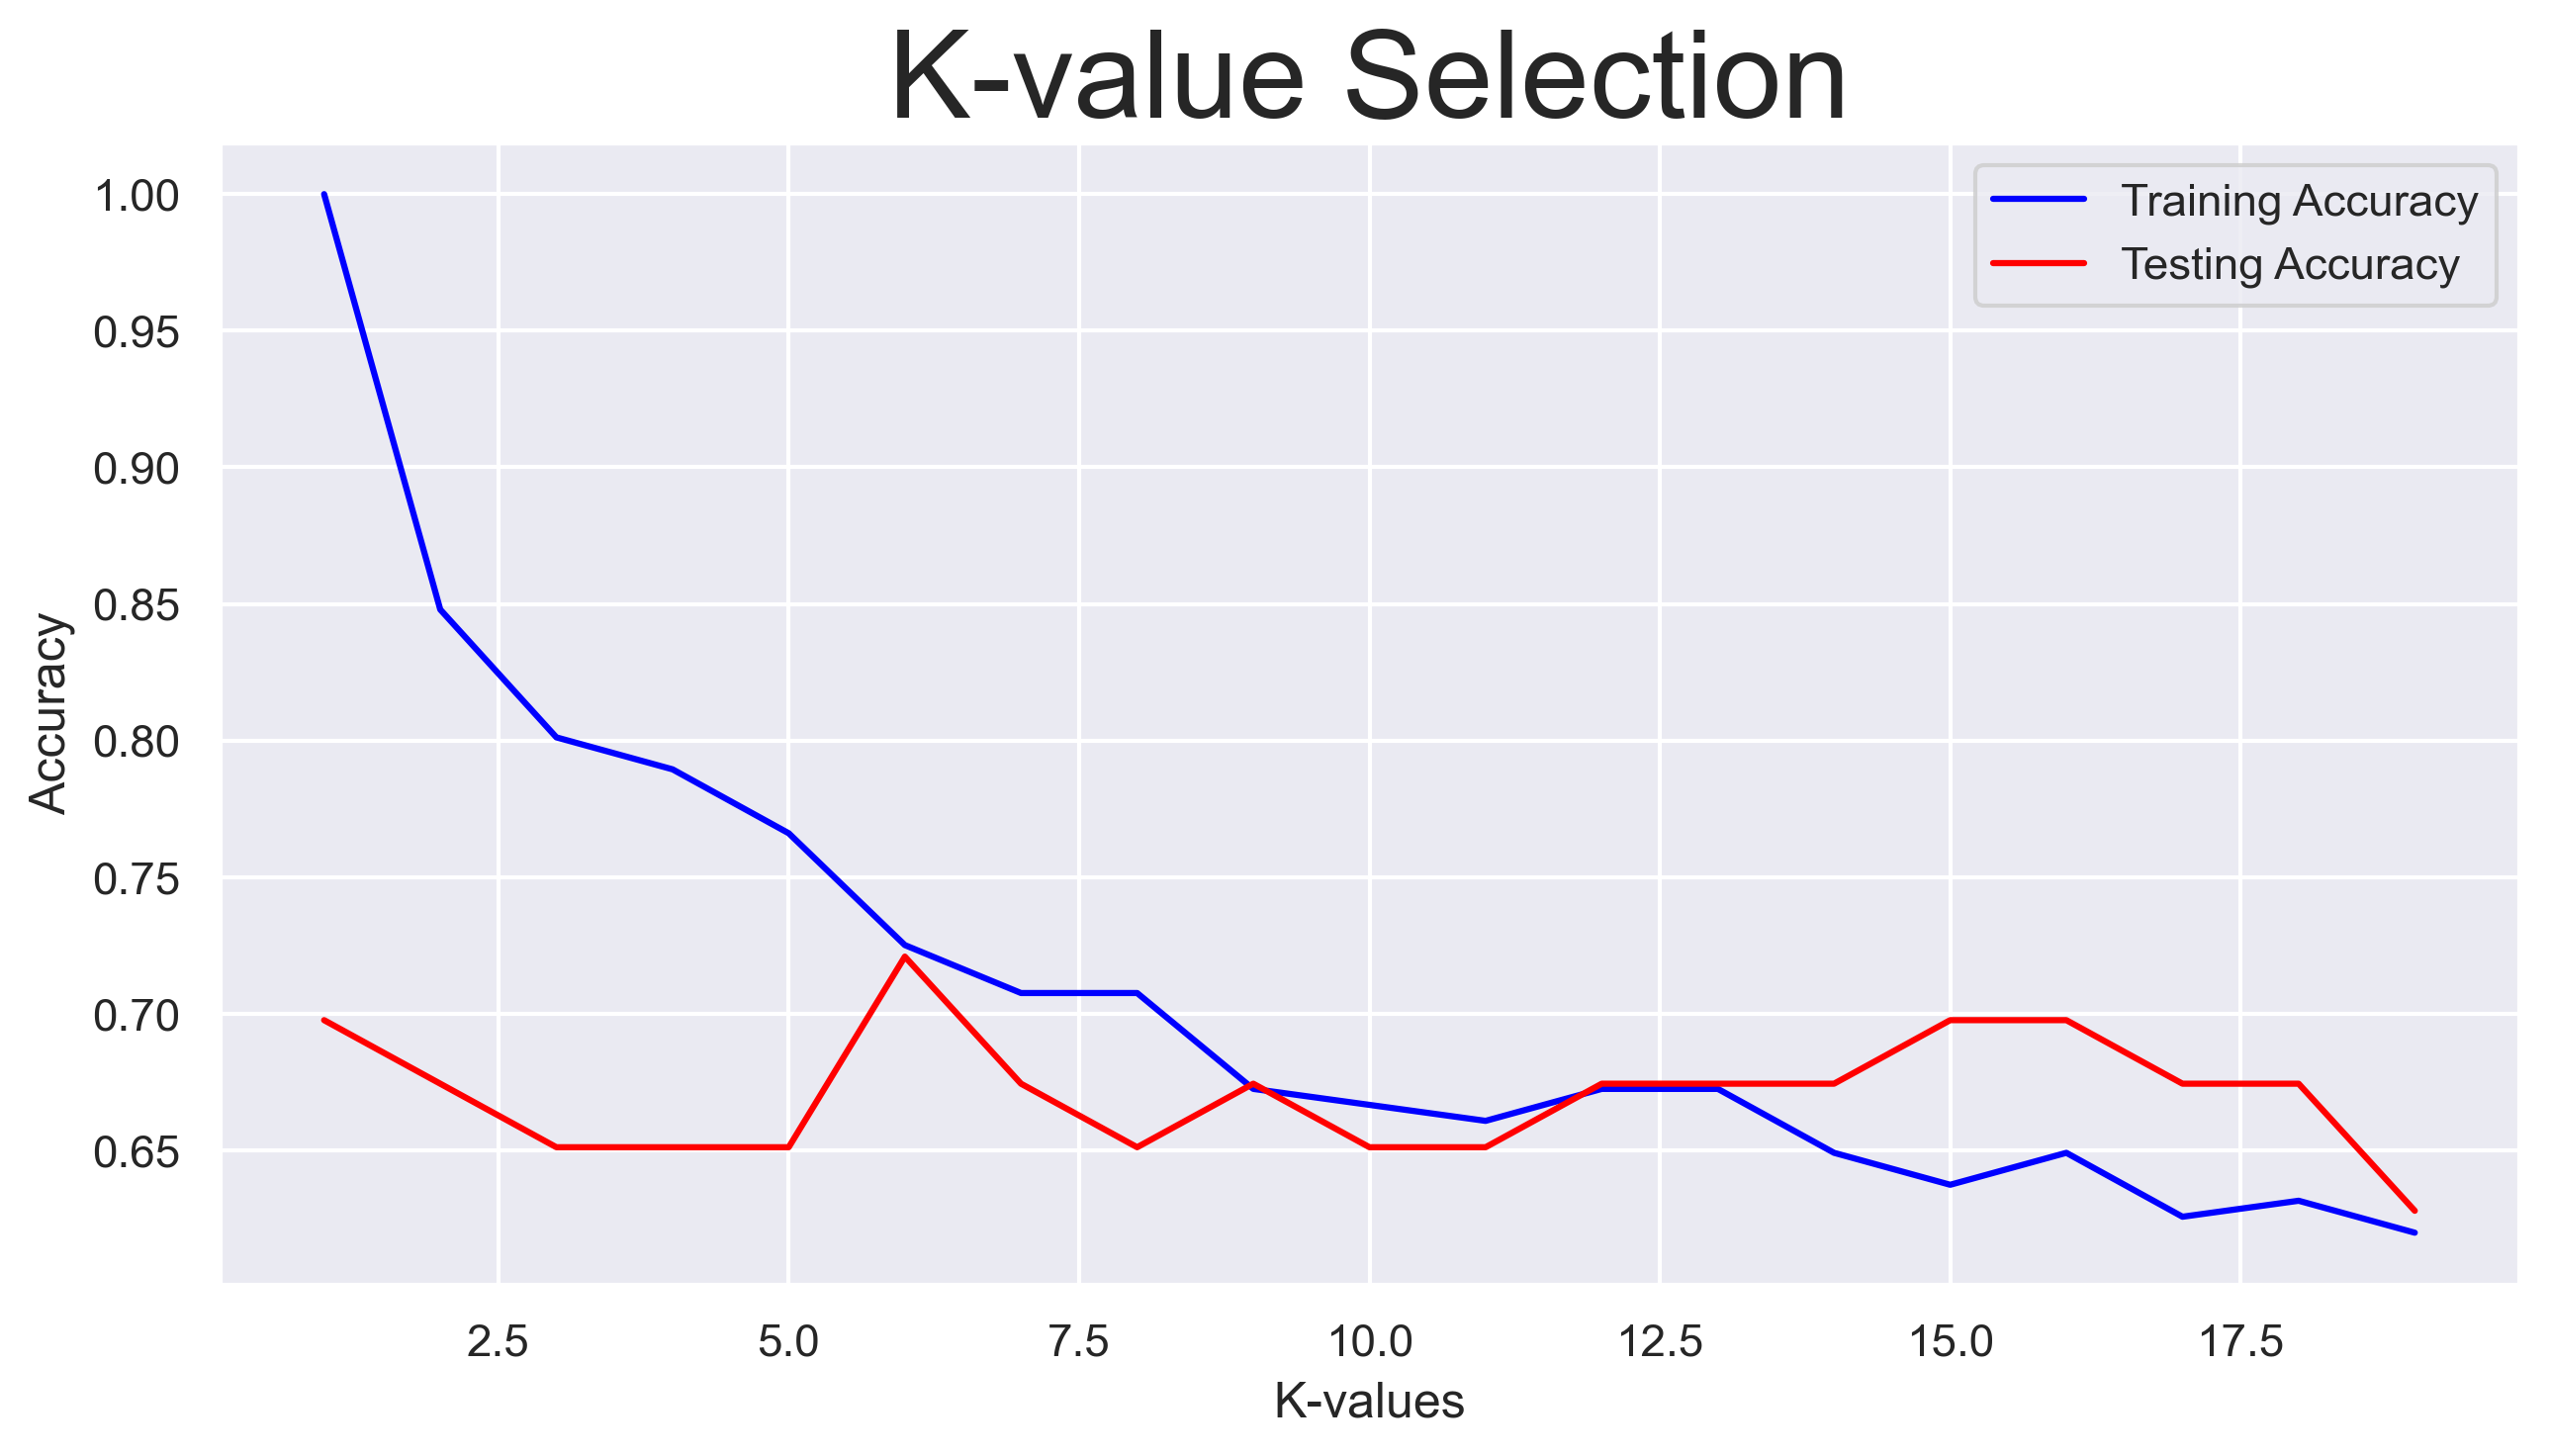

In [25]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [29]:
# From hyperpaameter tunning k -6 will give us acceptable training and testing accuracy

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.7251461988304093, 0.7209302325581395)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.72        43
   macro avg       0.73      0.77      0.75        43
weighted avg       0.64      0.72      0.68        43

